In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('Advertisingdata.csv')

In [13]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [14]:
df.shape

(200, 5)

We have 200 rows and 5 columns

In [15]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [16]:
df=df.rename(columns = {'Unnamed: 0': 'SNo'})

In [17]:
df

,SNo,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [18]:
df.set_index('SNo', inplace = True)

In [19]:
df

,TV,radio,newspaper,sales
SNo,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [20]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the datatypes are float datatype

In [21]:
df.shape

(200, 4)

In [22]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:ylabel='SNo'>

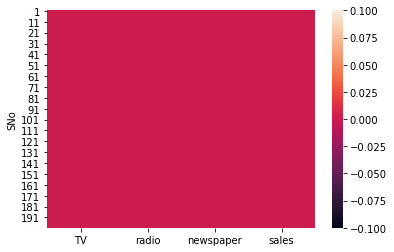

In [23]:
sns.heatmap(df.isnull())

There is no missing value

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [25]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

We can see the skewness in newspaper column

In [31]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are chances of outliers in TV and newspaper column as there is large difference between 75th Percentile and max.

# Univariate Analysis

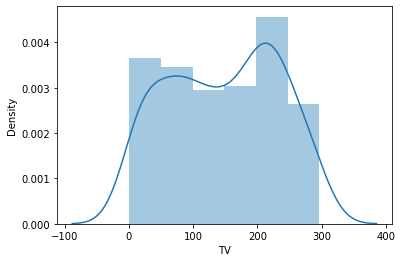

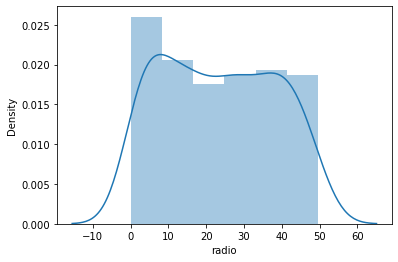

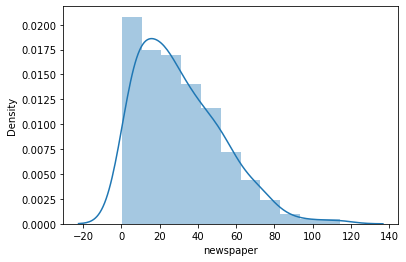

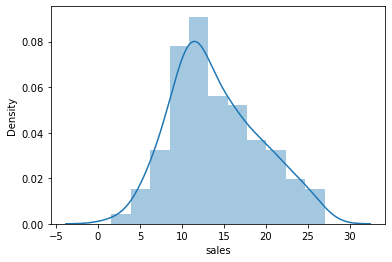

In [34]:
columns=['TV','radio','newspaper','sales']


for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

We can see the skewness in newspaper column

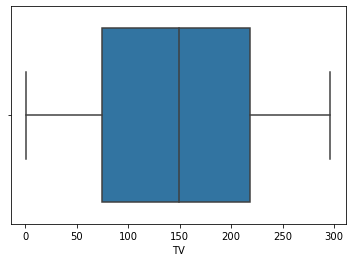

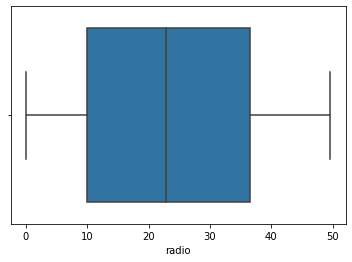

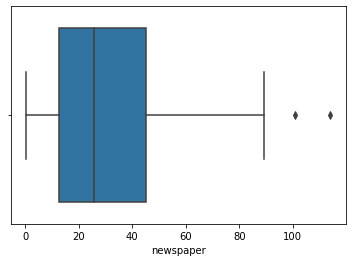

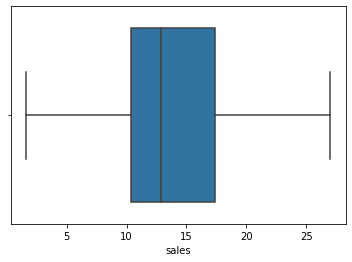

In [36]:
columns=['TV','radio','newspaper','sales']

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

There are outliers in newspaper column

# Bivariate Analysis

<AxesSubplot:xlabel='TV', ylabel='newspaper'>

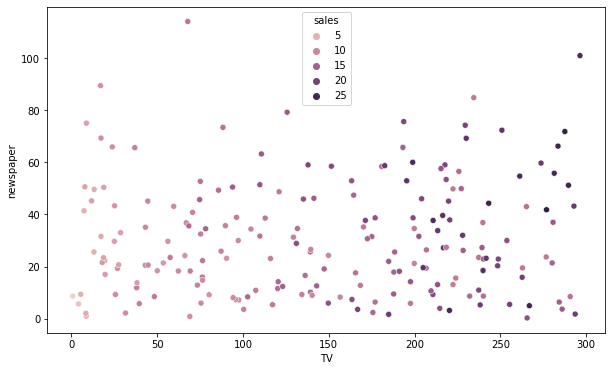

In [40]:
plt.figure(figsize=[10,6])
sns.scatterplot(df['TV'],df['newspaper'],hue=df['sales'])

<AxesSubplot:xlabel='TV', ylabel='radio'>

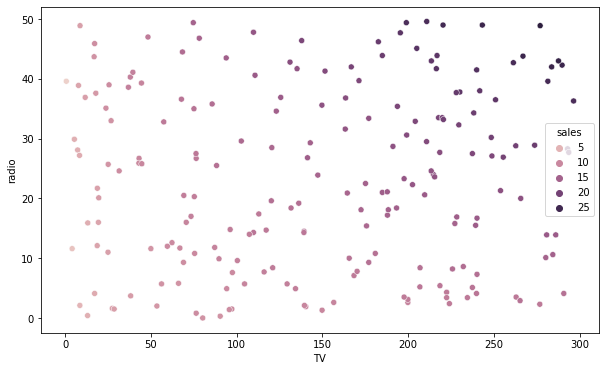

In [41]:
plt.figure(figsize=[10,6])
sns.scatterplot(df['TV'],df['radio'],hue=df['sales'])

# Multivariate Analysis

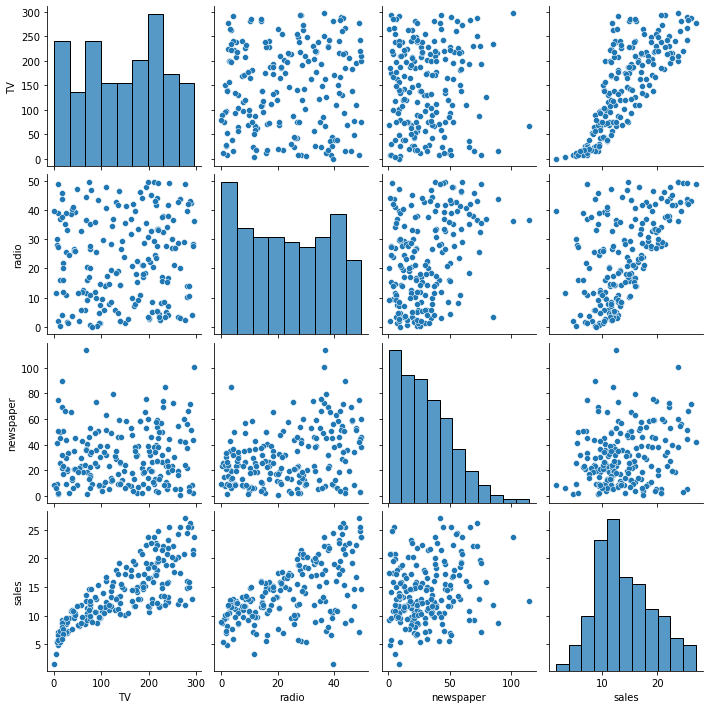

In [44]:
sns.pairplot(df)

We can see that there is a positive correlation between TV and sales

# Checking the correlation

In [45]:
dfcorr=df.corr()

In [46]:
dfcorr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

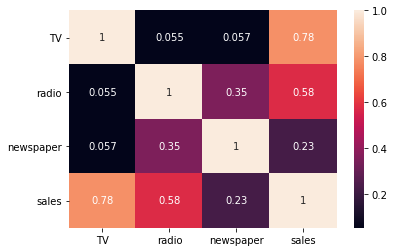

In [47]:
sns.heatmap(dfcorr,annot=True)

Observations
-All the variables are positively correlated to sales, amongst them,highest is TV. so we can say that highest sales 
by selling TV

# Outlier Removal

In [27]:
z=np.abs(zscore(df))

In [28]:
threshold=3
newdf=df[(z<3).all(axis=1)]

In [29]:
df.shape

(200, 4)

In [30]:
newdf.shape

(198, 4)

In [52]:
#so here, 2 rows are getting deleted
(2/200)*100
# data loss is less than 10% hence, it is acceptable

1.0

In [31]:
df=newdf

# Splitting the dataset

In [32]:
x=df.drop('sales',axis=1)

In [33]:
y=df['sales']

In [34]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

In [35]:
from sklearn.preprocessing import power_transform
pt=power_transform(x)

In [37]:
pt = pd.DataFrame(pt,columns=x.columns)

In [38]:
pt.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

In [39]:
x = pt

In [40]:
sc=StandardScaler()
df_x=sc.fit_transform(x)

df_x=pd.DataFrame(df_x,columns=x.columns)
df_x

,TV,radio,newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


In [41]:
x=df_x

In [42]:
x

,TV,radio,newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


# Finding the best random state

In [46]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)    

Best accuracy is 0.9456746173696738 for random state 90


# Training the model

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=90)
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
lm.score(x_test,y_test)
pred = lm.predict(x_test)
print(r2_score(y_test,pred))

0.9456746173696738


# Cross Validation of the model

In [48]:
cv_score=cross_val_score(lm,x,y,cv=5)
print('Cross validation of Linear Regression is: ',cv_score.mean())

Cross validation of Linear Regression is:  0.895827096855507


# Linear Regression Graph

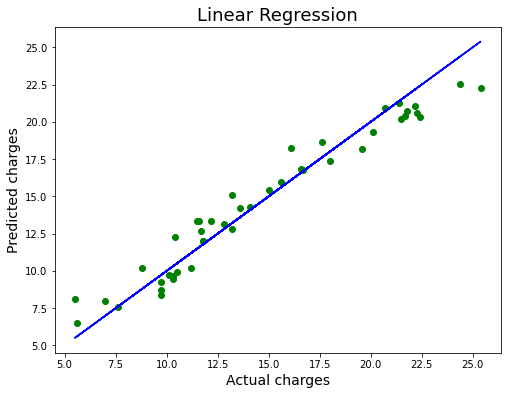

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=pred,color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# Regularization

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [53]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8356132893652914

In [54]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.825813015051709

# Ensemble technique

In [55]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print(r2_score(y_test,rfpred))

rfcvscore=cross_val_score(rf,x,y,cv=5)
print('Cross Validation score for Random Forest regressor is',rfcvscore.mean())

0.9788997141997484
Cross Validation score for Random Forest regressor is 0.9761536471578903


We are getting model accuracy and cross validation both as 97% which shows our model is performing extremely well

# Saving the model

In [56]:
import pickle
filename='advertising.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [57]:
loaded_model=pickle.load(open('advertising.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9788997141997484


In [58]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],rfpred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Predicted,17.814,6.497,23.301,19.585,16.087,21.268,21.17,12.698,22.909,8.879,...,9.854,11.859,9.555,12.476,15.534,15.134,19.489,11.869,12.506,16.972
Original,17.814,6.497,23.301,19.585,16.087,21.268,21.17,12.698,22.909,8.879,...,9.854,11.859,9.555,12.476,15.534,15.134,19.489,11.869,12.506,16.972
